# Trabajo Práctico

Se comienza por importar las liberías necesarias

In [ ]:
!pip install umap-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import chi2
from sklearn import decomposition
from sklearn.covariance import MinCovDet
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.covariance import MinCovDet
import umap

C:\Users\Leandro\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2 - Análisis Exploratorio (EDA)
Se comenzará haciendo un análisis explotarorio del dataset para conocer sus características principales y evaluar si es necesario hacer algún manejo de datos faltantes, outliers, codificar variables categóricas, o algún otro proceso antes de comenzar.

Para esto se hallarán:
1. Medidas de centralidad
2. Cuartiles y percentiles
3. Medidas de dispersión
4. Valores atípicos
5. Matriz de correlación
6. Métricas de distancia y similaridad: distancia de mahalanobis

En esta primera etapa se obtendrá información sobre el dataset y se realizarán gráficos que permitan observar los datos sin realizar modificaciones previas sobre el set de datos, es decir, se analizará el dataset tal como proviene de la fuente.

### 2.1 - Importar el dataset y visualizar el dataframe

Contexto:

La agricultura de precisión ( AP ) es una estrategia de gestión agrícola basada en observar, medir y responder a la variabilidad temporal y espacial para mejorar la sostenibilidad de la producción agrícola. El objetivo de la investigación en agricultura de precisión es definir un sistema de apoyo a las decisiones.(DSS) para la gestión de toda la finca con el objetivo de optimizar el rendimiento de los insumos y al mismo tiempo preservar los recursos.

Ayuda a los agricultores a tomar decisiones informadas sobre la estrategia agrícola. Aquí, se presenta un conjunto de datos cuyo análisis permitiría a los usuarios tener disponible información ordenada sobre los factores que influyen en los cultivos, como así también construir un modelo para agrupar los cultivos según patrones detectados en función de varios parámetros.

Descripción de las columnas:

- N: proporción del contenido de nitrógeno en el suelo (mg/kg)
- P: proporción del contenido de fósforo en el suelo (mg/kg)
- K: proporción del contenido de potasio en el suelo (mg/kg)
- temperature: La temperatura en grados Celsius.
- humidity: Porcentaje de humedad registrado.
- ph: Valor de ph medido.
- rainfall: La cantidad de lluvia registrada en mm.
- label: etiqueta con el nombre del alimento.



In [ ]:
crop_recommendation_df = pd.read_csv('Crop_recommendation.csv')
crop_recommendation_df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [ ]:
# Se averiguan la cantidad de filas y columnas en el dataset
crop_recommendation_df.shape

(2200, 8)

El dataset posee 2200 filas y 8 columnas correspondientes a variables que describen los datos

In [ ]:
# Se comprueba si existen o no filas duplicadas en el dataset
crop_recommendation_df.duplicated().sum()

0

El dataset no posee filas duplicadas. Es decir, no existe información redundante.

### 2.2 - Conocer las columnas
En este paso se imprime una lista de las columnas con sus respectivos tipos y cantidad de datos.

In [ ]:
crop_recommendation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# Se comprueba si existen valores nulos en las columnas del dataset
crop_recommendation_df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Se observa que no hay presencia de valores faltantes y que el tipo de dato especificado para cada columna se corresponde con lo que representan. Es decir, las columns N, P y K se corresponden con el tipo de dato numérico discreto, temperature, humidity, ph y rainfall con un valor numérico con decimales y label con texto.

Por lo divisado, no será requerido completar valores faltantes en el dataset ni realizar un cambio en el tipo de dato de las columnas del mismo.

In [ ]:
# Se quiere conocer qué cultivos fueron evluados para formar este dataset
unique_labels = crop_recommendation_df['label'].unique()
print("Valores únicos en la columna 'label':")
count = 0
for label in unique_labels:
    print(f'- {label}')
    count += 1
print('\n')
print(f'Cantidad de valores únicos en la columna label: {count}')

Valores únicos en la columna 'label':
- rice
- maize
- chickpea
- kidneybeans
- pigeonpeas
- mothbeans
- mungbean
- blackgram
- lentil
- pomegranate
- banana
- mango
- grapes
- watermelon
- muskmelon
- apple
- orange
- papaya
- coconut
- cotton
- jute
- coffee


Cantidad de valores únicos en la columna label: 22


In [ ]:
# Se observa la cantidad de filas presentes para cada cultivo
crop_recommendation_df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

Existe la misma cantidad de registros para cada alimento.

Se analizará si existen valores en las columnas que se encuentren fuera de rango en relación con la característica que representan.

In [ ]:
# Se comprueba si existen valores negativos para las columnas de potasio (K), fósforo (P) y nitrógeno (N)
crop_recommendation_df.loc[(crop_recommendation_df['K'] < 0) | (crop_recommendation_df['P'] < 0) | (crop_recommendation_df['N'] < 0)]

Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []

Considerando que las unidades para las columnas K, P y N son mg/kg, no podría representarse con valores negativos.

No se observa presencia de registros con valores negativos para dichas columnas.

In [ ]:
# Se comprueba si existen valores negativos para las mediciones de los milímetros de lluvia
crop_recommendation_df.loc[(crop_recommendation_df['rainfall'] < 0.0)]

Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []

Considerando que la unidad para la columna rainfall es mm no podría representarse con valores negativos. Es decir, no hay mediciones de mm de lluvia negativos.

No se observa presencia de registros con valores negativos para dicha columna.

In [ ]:
# Se observa si existen valores de porcentaje menores a 0 o mayores a 100 para la columna de humedad (humidity)
crop_recommendation_df.loc[(crop_recommendation_df['humidity'] < 0.0) | (crop_recommendation_df['humidity'] > 100.0)]

Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []

Considerando que la unidad para la columna humidity es % (porcentaje) no podría representarse con valores menores a cero o mayores a 100.

No se observa presencia de registros con valores inadecuados para dicha columna.

In [ ]:
# Se observa si existen valores menores a 0 o mayores a 14 para la columna ph
crop_recommendation_df.loc[(crop_recommendation_df['ph'] < 0.0) | (crop_recommendation_df['ph'] > 14.0)]

Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []

Considerando que los valores que puede tener el ph se encuentran entre 0 y 14 incluidos, no podría representarse con valores menores a cero o mayores a 14.

No se observa presencia de registros con valores inadecuados para dicha columna.

### 2.3 - Medidas estadísticas y de localización
En este paso se estudian, para cada columna, medidas de localización como mínimo, máximo, cuartiles, y de centralidad como la mediana y la media.

 Estas mediciones proporcionan una visión resumida de la distribución de los datos. Esto puede aportar valiosa información para el análisis e interpretación de los datos de suelo y su relación con los alimentos.

In [ ]:
# Se obtienen medidas estadísticas para el dataset completo
crop_recommendation_df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

Observaciones:

- Columna N: proporción del contenido de nitrógeno en el suelo (mg/kg)

  Los datos valores mostrados muestran una amplia variabilidad en los datos, con una media de alrededor de 50.55. La presencia de un valor máximo de 140, tan alejado del tercer cuartil puede ser indicador de valores atípicos. Además, hay una considerable dispersión en los datos, como indica la desviación estándar relativamente alta. También, una mediana menor a la media, hace pensar que el gráfico de caja mostrará el lado derecho de la caja más amplio que el izquierdo.

- Columna P: proporción del contenido de fósforo en el suelo (mg/kg)

  Los datos de la proporción de fósforo también muestran variabilidad, con una media de aproximadamente 53.36. La presencia de un valor mínimo de 5 sugiere que no hay muestras de granos que no hayan tenido proporción de fósforo en el suelo, es decir, no se llega a 0. La desviación estándar indica una dispersión considerable en los datos. El valor máximo está muy alejado del tercer cuartil, lo que es iindicio de presencia de valores atípicos.

- Columna K: proporción del contenido de potasio en el suelo (mg/kg)

  La desviación estándar es alta en comparación con la media, lo que indica una amplia variabilidad en los datos. La presencia de un valor mínimo de 5 sugiere que no hay valores extremadamente bajos. La discrepancia entre la media y la mediana, junto con la alta desviación estándar, indica que la distribución de los datos es altamente asimétrica y está sesgada hacia los valores más bajos. Además los valores máximo y mínimo y su diferencia con el tercer y el primer cuartil respectivamente, indican una considerable variabilidad y dispersión en los datos, con la presencia de valores atípicos o extremos.

- Columna temperature: Temperatura en grados Celsius

  La temperatura media y la mediana son muy similares, dando indicio de una distribución simétrica. La desviación estándar es relativamente baja en comparación con la media, lo que sugiere que los datos no se encuentran muy dispersos, sino que están relativamente cerca de la media.

- Columna humidity: Porcentaje de humedad registrado

  El porcentaje de humedad tiene una media de aproximadamente 71.48. La desviación estándar es considerable, lo que indica una amplia variabilidad en los datos. La presencia de un valor mínimo de 14.26 sugiere que no hay valores extremadamente bajos. Los valores del primer y tercer cuartil indican que se registran mayormente valores elevados de humedad en el suelo.

- Columna ph: Valor de ph medido

  El pH medio y la mediana medidas son casi iguales, indicanso que la distribución es simétrica. La desviación estándar es relativamente baja en comparación con la media, lo que sugiere que los datos están relativamente cerca de la media. Los valores mínimos y máximos no se encuentran extremadamente alejados de los cuartiles q1 y q3.

- Columna rainfall: Cantidad de lluvia registrada en mm

  Los datos de cantidad de lluvia están sesgados hacia la izquierda, ya que la mediana es mayor que la media. La amplia variabilidad en los datos, indicada por la alta desviación estándar, sugiere que la cantidad de lluvia puede variar significativamente.


### 2.5 - Visualización de gráficos y matriz de correlación

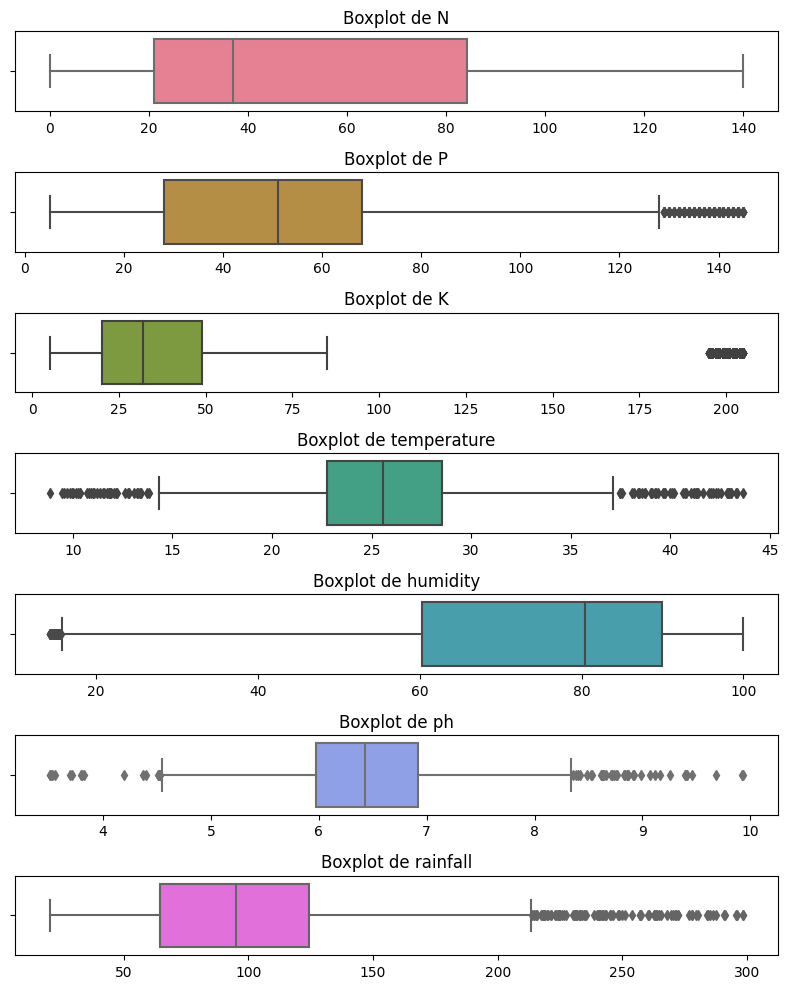

In [ ]:
# Columnas
columns = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]

# Colores para los boxplots
colors = sns.color_palette('husl', n_colors=len(columns))

# Crear subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(8, 10), sharex=False)

# Generar boxplots horizontales para cada columna
for i, col in enumerate(columns):
    sns.boxplot(data=crop_recommendation_df, x=col, ax=axes[i], color=colors[i], orient='h')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')  # Elimina la etiqueta del eje x para mayor claridad

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

En la mayoría de las columnas, los gráficos de caja muestran presencia de outliers. No solo detecta valores atípicos, sino que, para las columnas que los tienen se observa una gran cantidad de los mismos, estando en general relativamente cerecanos entre ellos.

Teniendo lo anterior en cuenta, se realizará otro gráfico que permita conocer las frecuencias de los valores para cada variable y comprender mejor la distribución de los datos.

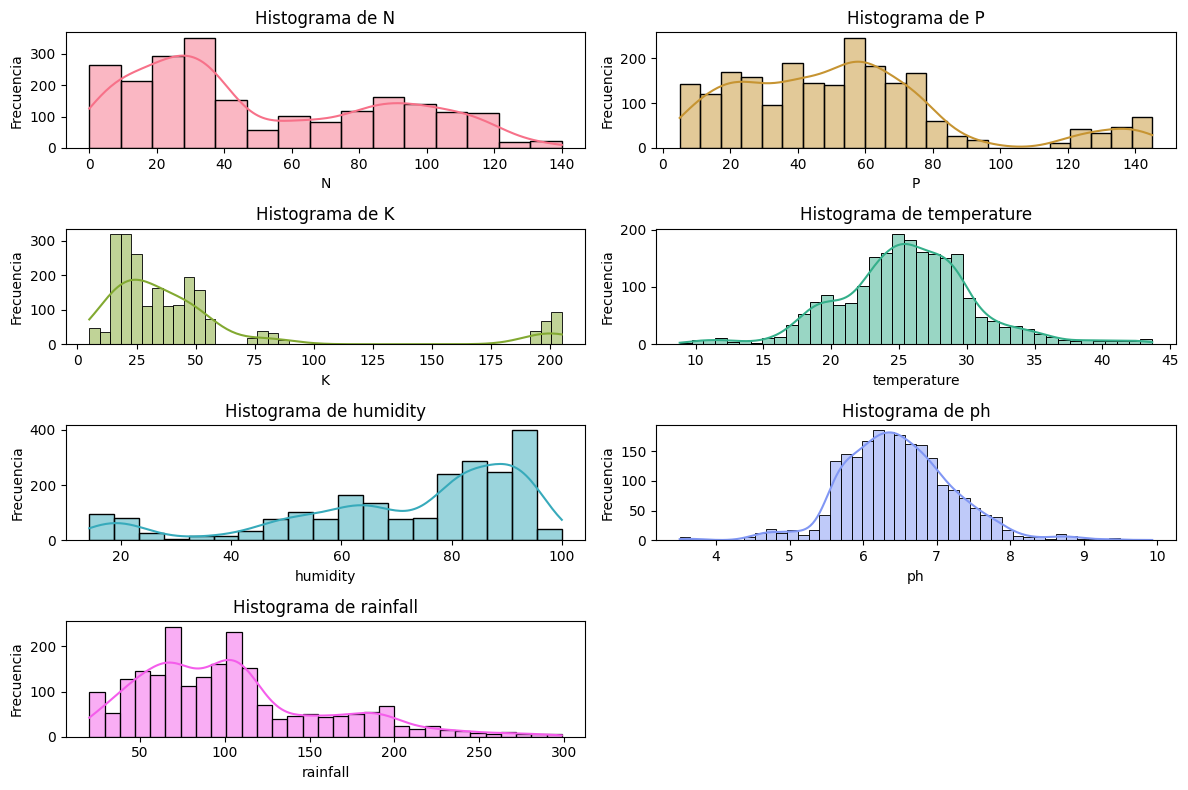

In [ ]:
# Define la paleta de colores
colors = sns.color_palette('husl', n_colors=len(crop_recommendation_df.columns) - 1)  # Excluye la columna 'label'

# Filtra las columnas que no sean 'label'
numeric_columns = [column for column in crop_recommendation_df.columns if column != 'label']

# Configura el tamaño de la figura
plt.figure(figsize=(12, 8))

# Itera a través de cada columna numérica y crea un histograma (excluyendo 'label')
for i, column in enumerate(numeric_columns):
    plt.subplot((len(numeric_columns) + 1)//2, 2, i+1)  # Divide la figura en subplots
    sns.histplot(crop_recommendation_df[column], color=colors[i], kde=True)  # Crea el histograma
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

# Ajusta el espacio entre subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()

Se observa que las distribuciones para los nutrientes K, P y N son similares, junto con la de rainfall.

Se destaca además que para dichas variables existe gran amplitud en los valores de los datos y que, como la distribución a simple vista se nota sesgada a la izquierda, los valores que se encuentran en el extremo derecho pueden corresponderse con los atípicos definidos en los boxplot. Otro detalle importante es que la frecuencia de los mencionados valores no es despreciable. Es importante determinar si son valiosos para el análisis.


Además, en vista de las similitudes en distribución que muestran ciertas variables, se procederá a crear la matriz de correlación para las mismas a fin de observar el nivel de correlación lineal entre ellas.

<ipython-input-19-11c6d90a0ae3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crop_recommendation_df.corr()


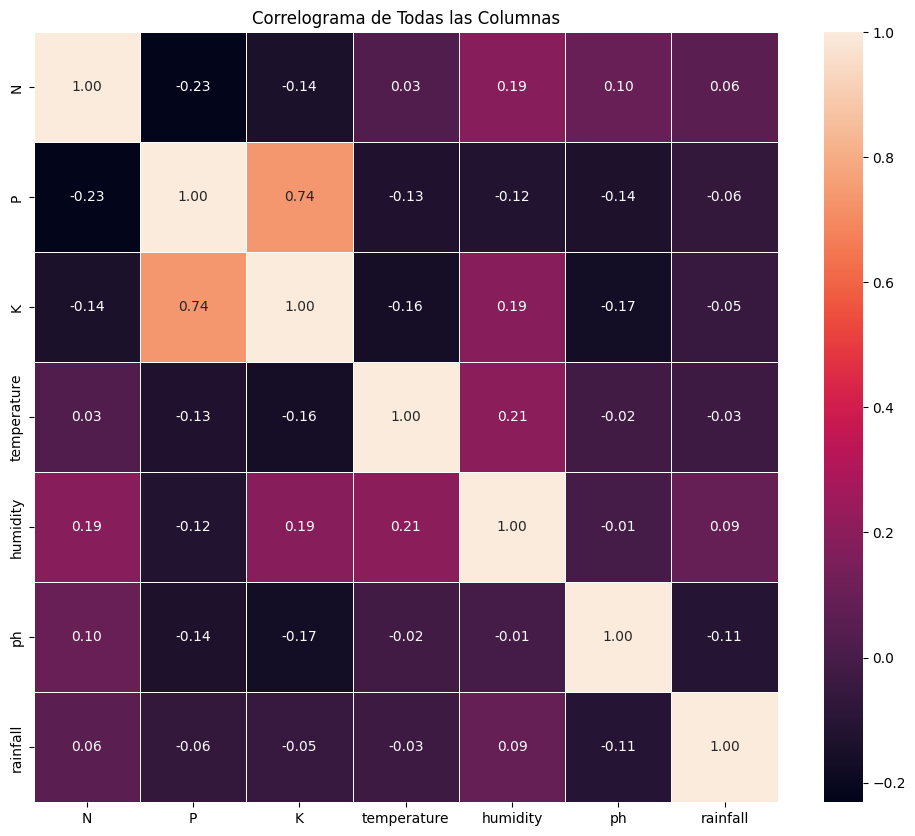

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = crop_recommendation_df.corr()

# Crear un mapa de calor (correlograma)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='rocket', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlograma de Todas las Columnas')
plt.show()

Se observa que no se detectan correlaciones lineales entre las variables. Solo se encuentra una muy alta, en relación a las demás entre los nutrientes fósforo (P) y potasio (K). Dicha correlación es positiva, indicando que a medida que el valor de una aumenta, el de la otra también lo hace.

Se observará la dispersión entre las columnas para conocer cómo se representa ése valor de correlación gráficamente.

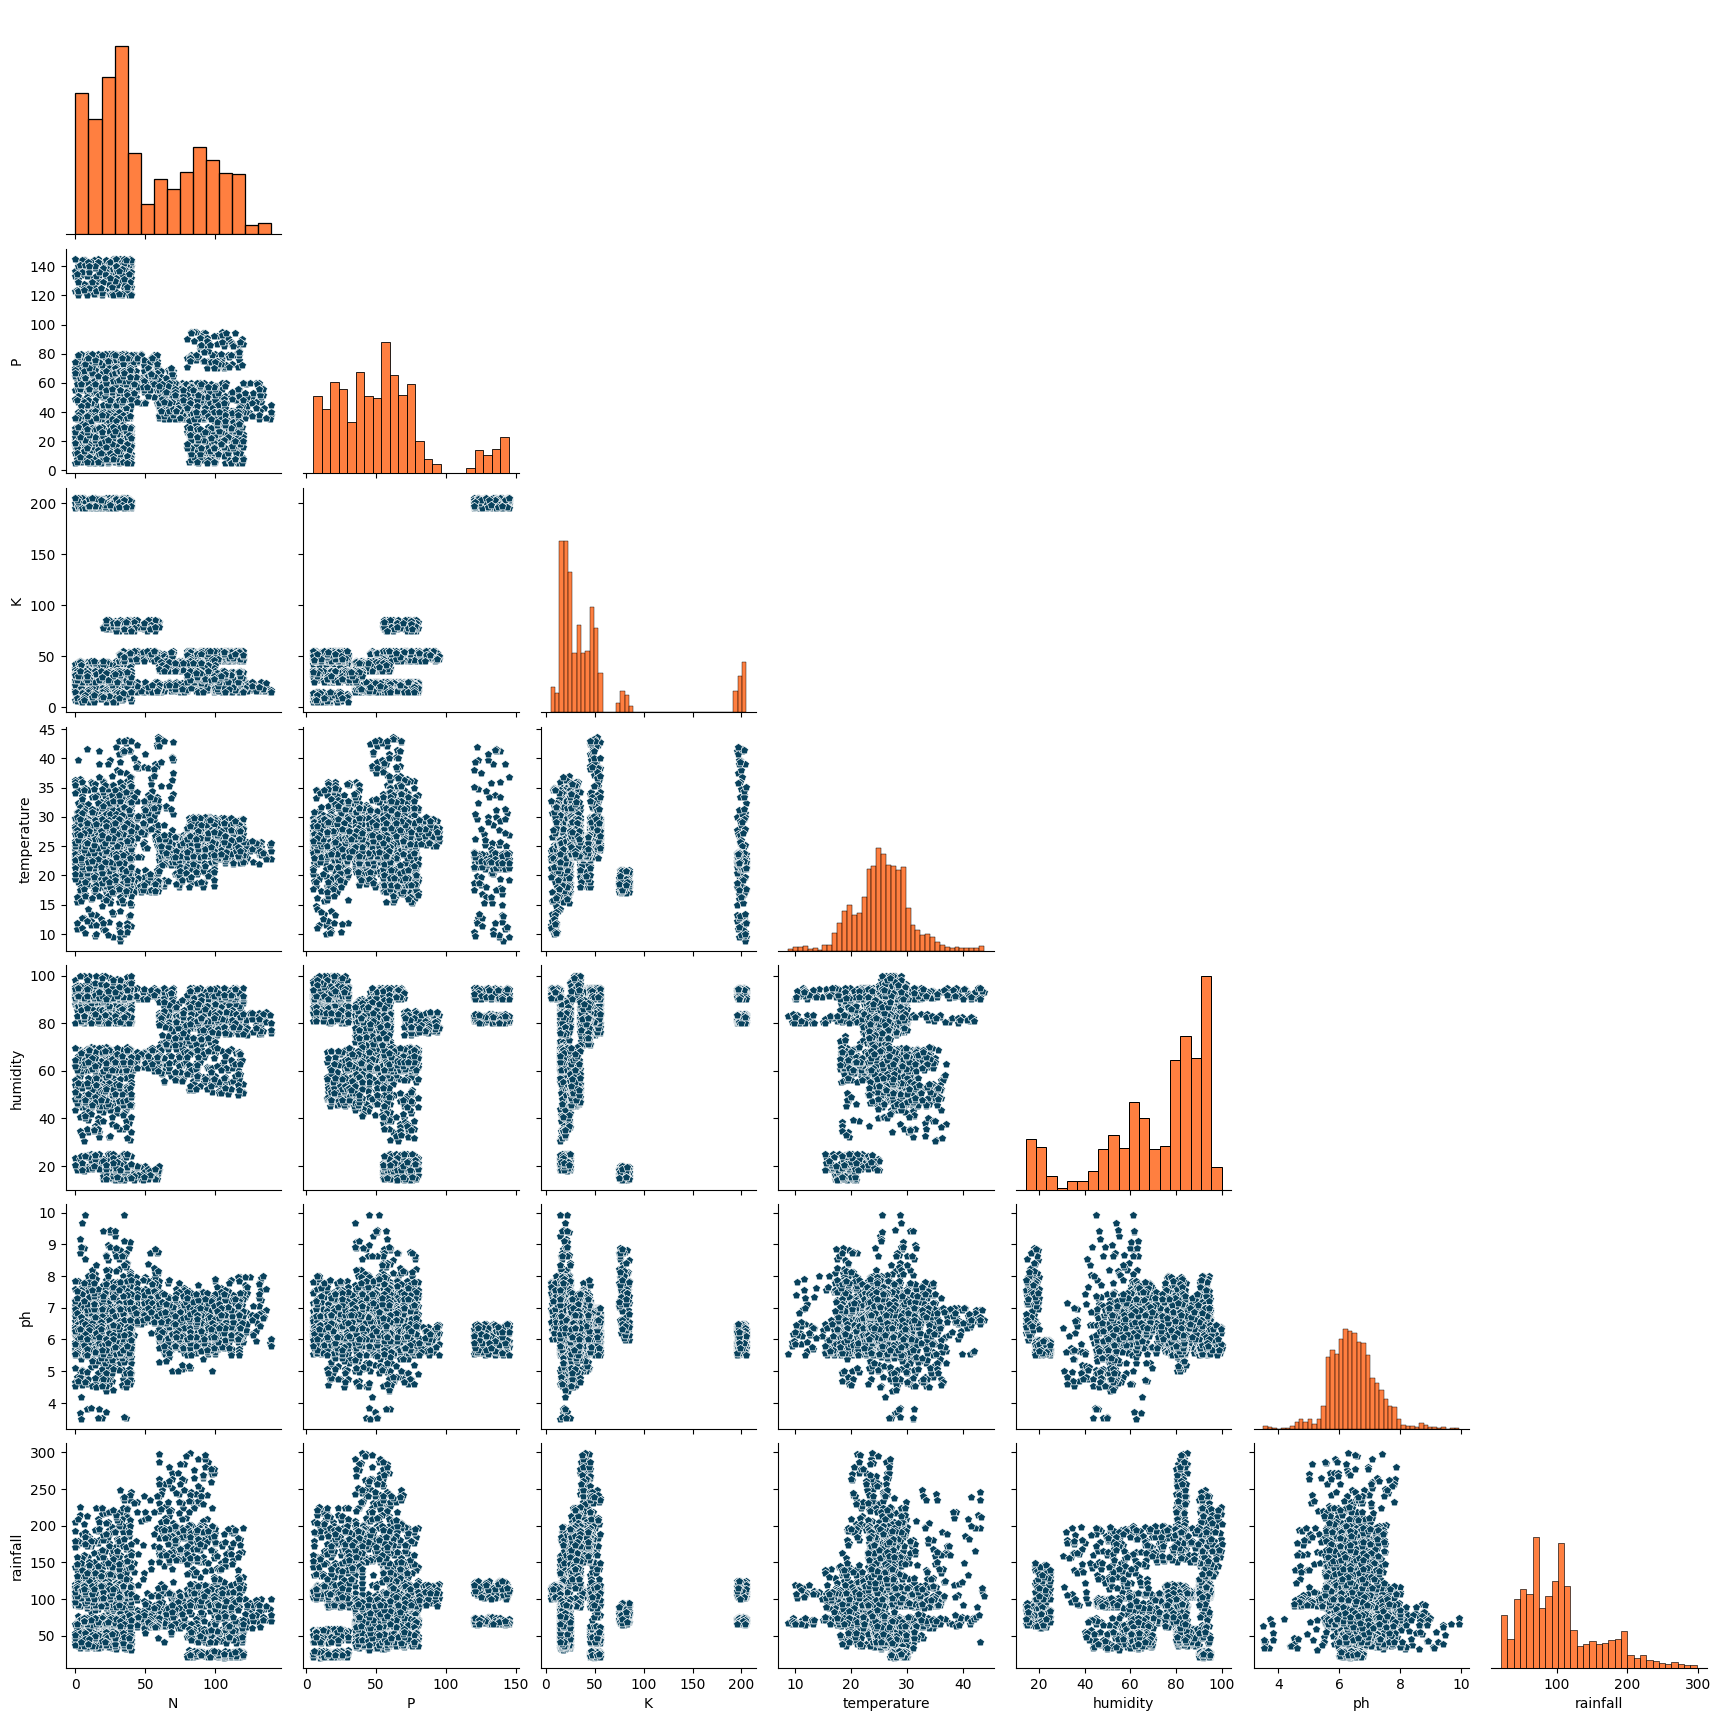

In [ ]:
sns.pairplot(crop_recommendation_df, plot_kws = {'color': '#08415c', 'marker': 'p'},
             diag_kws = {'color': '#ff5400'}, corner = True)

histogramas

analizar la distribucion. Si está o o blanceada. Hacer hipótesis si los datos alejados pero que son relativamente frecuentes pueden pertenecer a una misma clase

distancia de mahalanobis:
La distancia de Mahalanobis (MD) es la distancia entre dos puntos en un espacio multivariado . En un espacio euclidiano regular , las variables (por ejemplo, x, y, z) se representan mediante ejes trazados en ángulo recto entre sí; La distancia entre dos puntos cualesquiera se puede medir con una regla. Para variables no correlacionadas, la distancia euclidiana es igual a la MD. Sin embargo, si dos o más variables están correlacionadas , los ejes ya no están en ángulo recto y las mediciones se vuelven imposibles con una regla. Además, si tiene más de tres variables, no puede trazarlas en un espacio 3D regular. El MD resuelve este problema de medición, ya que mide distancias entre puntos, incluso puntos correlacionados para múltiples variables.

El uso más común de la distancia de Mahalanobis es encontrar valores atípicos multivariados , lo que indica combinaciones inusuales de dos o más variables. Por ejemplo, es bastante común encontrar una mujer de 6 pies de altura que pese 185 libras, pero es raro encontrar una mujer de 4 pies de altura que pese tanto.

Quizá aplicar distancia de mahalanobis en las varioables que poseen alto nivel de correlación

In [ ]:
# Imprime la cantidad de datos antes de eliminar los outliers
print("Cantidad de datos antes de eliminar outliers:", len(crop_recommendation_df))

# Define un nivel de significancia (puedes ajustarlo según tus necesidades)
alpha = 0.01

# Guarda los índices del DataFrame original
original_indices = crop_recommendation_df.index

# Calcula la matriz de covarianza robusta utilizando el Minimum Covariance Determinant
mcd = MinCovDet().fit(crop_recommendation_df.drop(columns=['label']))

# Calcula la matriz de inversa de la covarianza robusta
cov_inv = np.linalg.inv(mcd.covariance_)

# Calcula la distancia de Mahalanobis para cada punto en el DataFrame original
mahalanobis_dist = np.zeros(len(crop_recommendation_df))
for i, row in enumerate(crop_recommendation_df.drop(columns=['label']).values):
    mahalanobis_dist[i] = np.sqrt(np.dot(np.dot((row - mcd.location_).T, cov_inv), (row - mcd.location_)))

# Calcula el valor crítico de la distancia de Mahalanobis
df = len(crop_recommendation_df.columns) - 1
threshold = chi2.ppf(1 - alpha, df)

# Filtra los datos que no son outliers y mantiene las etiquetas de clase
crop_recommendation_df_filtered = crop_recommendation_df.loc[mahalanobis_dist < threshold]

# Imprime la cantidad de datos después de eliminar los outliers
print("Cantidad de datos después de eliminar outliers:", len(crop_recommendation_df_filtered))


Cantidad de datos antes de eliminar outliers: 2200
Cantidad de datos después de eliminar outliers: 2173


In [ ]:
crop_recommendation_df_filtered

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2173 rows x 8 columns]

Se quiere conocer qué valores fueron eliminados para comprobar que no corresponden todos a la misma clase.

Si esto fuera así, se estaría eliminando gran parte de los datos que corresponden a un único grupo. El tener menos datos puede llevar a perder representatividad y aumentar el sesgo.

Queremos conocer si aquellos registros que se consideran outliers corresponden a una única clase ya que de ser así, tendríamos que considerarlos para el análisis.

In [ ]:
# Encontrar filas diferentes
diferentes = pd.concat([crop_recommendation_df, crop_recommendation_df_filtered]).drop_duplicates(keep=False)

# El DataFrame "diferentes" ahora contiene las filas que son diferentes entre los dos DataFrames
diferentes

N    P    K  temperature   humidity        ph    rainfall   label
1208   6  123  203    12.756796  81.624974  6.130310   66.778446  grapes
1209  17  134  204    39.040720  80.183933  6.499605   73.884670  grapes
1211  27  145  205     9.467960  82.293355  5.800243   66.027652  grapes
1213  16  139  203    17.828037  80.960934  6.275641   65.847488  grapes
1214  32  141  204     8.825675  82.897537  5.536646   67.235765  grapes
1216  31  144  202    11.021054  80.555572  5.870601   68.239632  grapes
1217   3  136  205    17.586294  80.848066  6.334771   71.406545  grapes
1225  24  140  205    12.087022  83.593987  5.932029   68.668134  grapes
1227   5  126  197    12.800004  81.208764  6.417501   67.104394  grapes
1231   7  126  203    16.762017  82.003356  5.662140   73.287128  grapes
1233   9  141  202    21.012454  81.179319  6.119495   66.384483  grapes
1234  20  142  196    10.898759  80.016394  6.207601   68.694204  grapes
1239  20  122  204    11.797647  80.863254  6.487370   65.069625  grapes
1240  40  126  201    11.363009  80.031000  6.116983   71.182894  grapes
1250  32  120  204    10.380048  83.445181  6.138959   67.391738  grapes
1254  21  134  202    10.723025  80.021306  6.425420   65.298211  grapes
1263  37  135  205    11.827682  80.282719  5.510925   74.102251  grapes
1270   6  140  205    17.665584  82.929034  6.313086   69.867126  grapes
1282   1  132  200    16.278528  82.942701  5.620746   66.574628  grapes
1288  37  144  197    11.189943  80.808431  6.415556   66.342349  grapes
1291  14  121  203     9.724458  83.747656  6.158689   74.464111  grapes
1293  32  138  197     9.535586  80.731127  5.908724   69.441152  grapes
1294  11  124  204    13.429886  80.066340  6.361141   71.400430  grapes
1295  23  138  200     9.851243  80.226317  5.965379   68.428024  grapes
1299  35  134  204     9.949929  82.551390  5.841138   66.008176  grapes
1543   5  144  205    21.421772  92.626653  6.184923  102.804566   apple
1588   0  145  205    21.225034  90.098778  5.520783  113.976046   apple

Considerando que casi la totalidad de los datos eliminados en la consideración de outliers son grapes se procederá a conocer si efectivamente corresponden a valores outliers dentro de esta clase específica o si los datos eliminados integran el conjunto de observaciones a analizar.

Para ello se realizará un boxplot únicamente para la clase grapes.

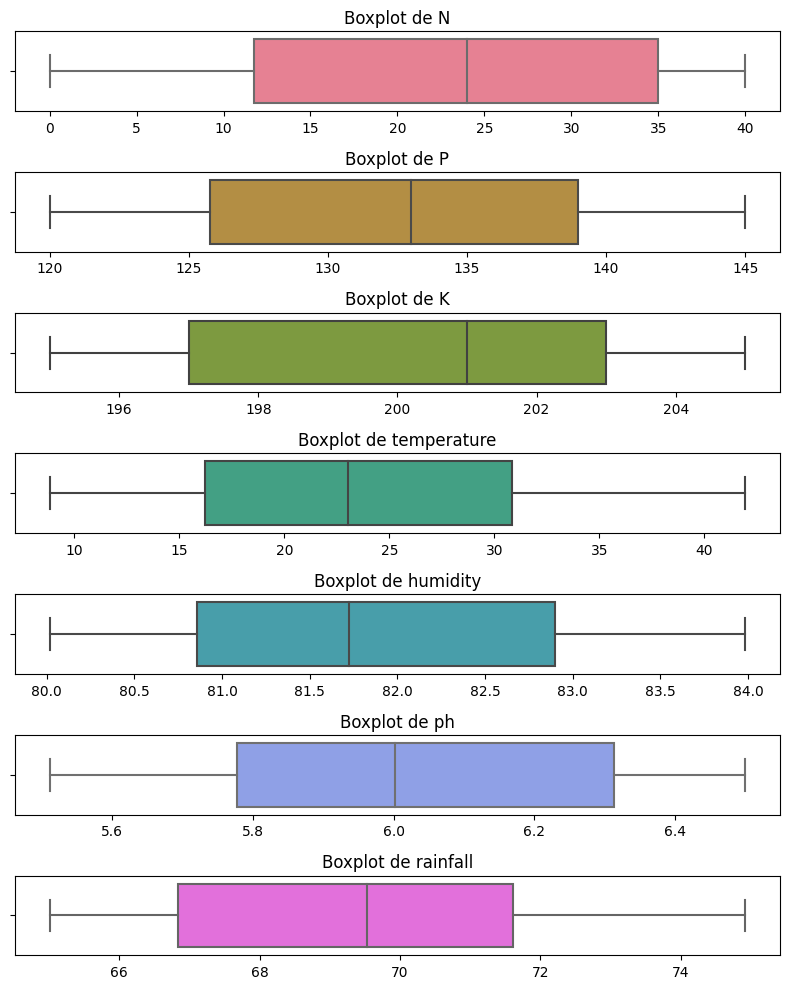

In [ ]:
# Columnas
columns = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]

# Colores para los boxplots
colors = sns.color_palette('husl', n_colors=len(columns))

# Crear subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(8, 10), sharex=False)

# Generar boxplots horizontales para cada columna en la clase grapes
for i, col in enumerate(columns):
    sns.boxplot(data=crop_recommendation_df[crop_recommendation_df['label'] == 'grapes'], x=col, ax=axes[i], color=colors[i], orient='h')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')  # Elimina la etiqueta del eje x para mayor claridad

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
# Cantidad total de filas con el label grape en el dataset original
total_grapes = crop_recommendation_df[crop_recommendation_df['label'] == 'grapes']['label'].count()

# Cantidad de filas con el label grapes eliminadas como outliers
deleted_grapes = diferentes[diferentes['label'] == 'grapes']['label'].count()

print(f'Cantidad total de filas con el label grape en el dataset original: {total_grapes}')
print(f'Cantidad de filas con el label grapes eliminadas como outliers: {deleted_grapes}')

Cantidad total de filas con el label grape en el dataset original: 100
Cantidad de filas con el label grapes eliminadas como outliers: 25


Se repiten las observaciones para la clase apple, para la que se habían eliminado dos registros

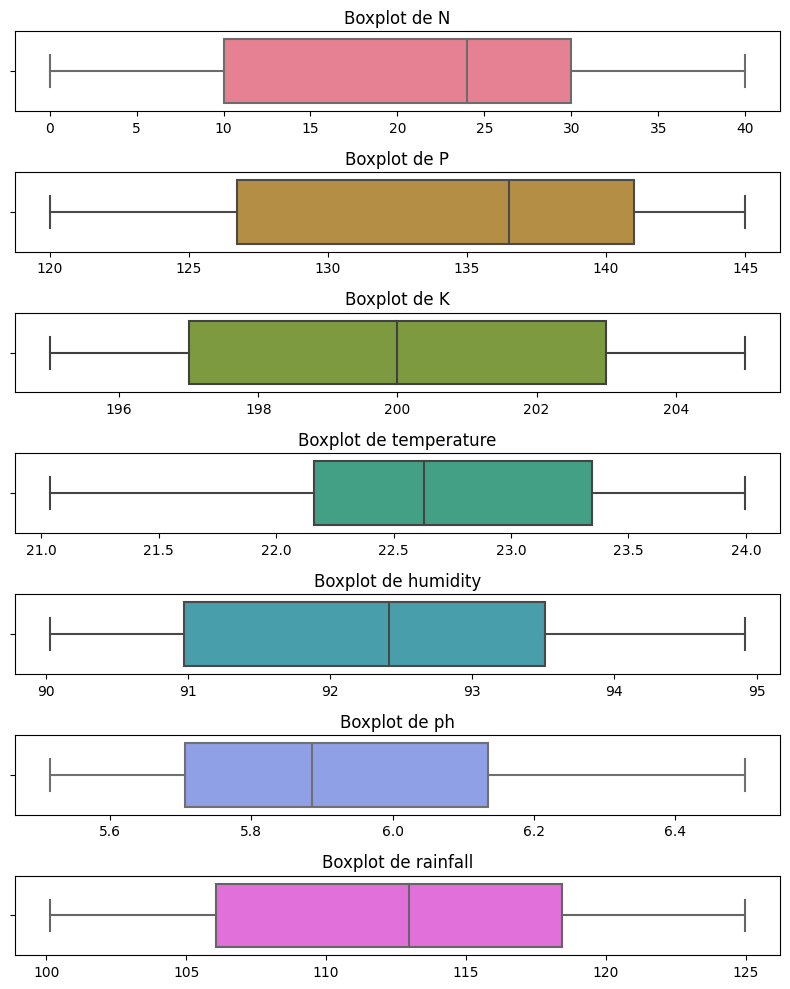

In [ ]:
# Columnas
columns = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]

# Colores para los boxplots
colors = sns.color_palette('husl', n_colors=len(columns))

# Crear subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(8, 10), sharex=False)

# Generar boxplots horizontales para cada columna en la clase grapes
for i, col in enumerate(columns):
    sns.boxplot(data=crop_recommendation_df[crop_recommendation_df['label'] == 'apple'], x=col, ax=axes[i], color=colors[i], orient='h')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')  # Elimina la etiqueta del eje x para mayor claridad

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
# Cantidad total de filas con el label grape en el dataset original
total_apple = crop_recommendation_df[crop_recommendation_df['label'] == 'apple']['label'].count()

# Cantidad de filas con el label apple eliminadas como outliers
deleted_apple = diferentes[diferentes['label'] == 'apple']['label'].count()

print(f'Cantidad total de filas con el label grape en el dataset original: {total_apple}')
print(f'Cantidad de filas con el label apple eliminadas como outliers: {deleted_apple}')

Cantidad total de filas con el label grape en el dataset original: 100
Cantidad de filas con el label apple eliminadas como outliers: 2


ver si hay que trabajar con los outliers

### 2.6 - Estandarización
El proceso de PCA identifica aquellas direcciones en las cuales la varianza es mayor. Como la varianza de una variable se mide en su misma escala elevada al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media 0 y desviación estándar 1, aquellas variables cuya escala sea mayor dominarán al resto.

Por esto se eligió la estandarización Z-Score. Este método escala cada característica restando la media de la característica y dividiendo por su desviación estándar.


In [ ]:
# Excluye la columna "label" antes de estandarizar los datos
data_to_standardize = crop_recommendation_df.drop(columns=['label'])

# Estandariza tus datos
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_to_standardize)

## 3 - Aplicar PCA
Realizar PCA y determinar el número de componentes principales considerando alguno de los 3 criterios dados en la práctica. Graficar la varianza acumulada y las componentes de PCA en un grafico 2 o 3D con sus respectivas clases.

In [ ]:
# Realiza el PCA en los datos estandarizados
pca = PCA(n_components=data_to_standardize.shape[1])
principal_components = pca.fit_transform(standardized_data)

# Columns for PCA dataframe
pc_columns = [f'PC{i}' for i in range(1, len(data_to_standardize.columns) + 1)]

# PC dataframe
pca_df = pd.DataFrame(
    data=principal_components,
    columns=pc_columns)
pca_df['label'] = crop_recommendation_df['label']

pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.582869 -0.844586  1.373343 -1.614129  0.308224 -0.095997 -0.025239   
1    -0.474635 -0.784895  1.252178 -1.792762  1.107745 -0.532255 -0.280543   
2    -0.634068 -0.694522  1.179332 -1.818106  2.523263 -0.538551 -0.105967   
3    -1.047920 -1.087658  1.393351 -0.982401  1.448781 -0.656929  0.275272   
4    -0.873258 -0.658673  1.455685 -2.335012  1.959633 -0.318025  0.052740   
...        ...       ...       ...       ...       ...       ...       ...   
2195 -1.260921 -0.618363  0.711297 -1.014970  0.133230 -1.122259  0.307025   
2196 -1.355583 -0.154043  0.701649 -0.197683 -0.898658 -0.771476  0.684957   
2197 -1.158384 -0.640475  1.045840 -1.301841 -0.491765 -0.885129  0.203463   
2198 -1.219188  0.052390  0.180855 -0.990499 -0.601388 -1.308967  0.509656   
2199 -1.373004  0.055818  0.500654 -1.219230 -0.346351 -0.572730  0.577993   

       label  
0       rice  
1       rice  
2       rice  
3       rice  
4       rice  
...      ...  
2195  coffee  
2196  coffee  
2197  coffee  
2198  coffee  
2199  coffee  

[2200 rows x 8 columns]

aplicar técnicas

In [ ]:
# Variabilidad explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la proporción acumulada de varianza explicada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Crear un DataFrame con las columnas requeridas
pca_exp_var_df = pd.DataFrame({
    "Eigenvalues": principal_components.var(axis=0),  # Varianza explicada por cada componente principal
    "Proporción de varianza explicada": explained_variance_ratio,
    "Proporción acumulada de varianza explicada": cumulative_variance_ratio
})

pca_exp_var_df

Eigenvalues  Proporción de varianza explicada  \
0     1.931218                          0.275888   
1     1.293910                          0.184844   
2     1.076509                          0.153787   
3     1.022891                          0.146127   
4     0.805928                          0.115133   
5     0.676562                          0.096652   
6     0.192981                          0.027569   

   Proporción acumulada de varianza explicada  
0                                    0.275888  
1                                    0.460733  
2                                    0.614520  
3                                    0.760647  
4                                    0.875780  
5                                    0.972431  
6                                    1.000000

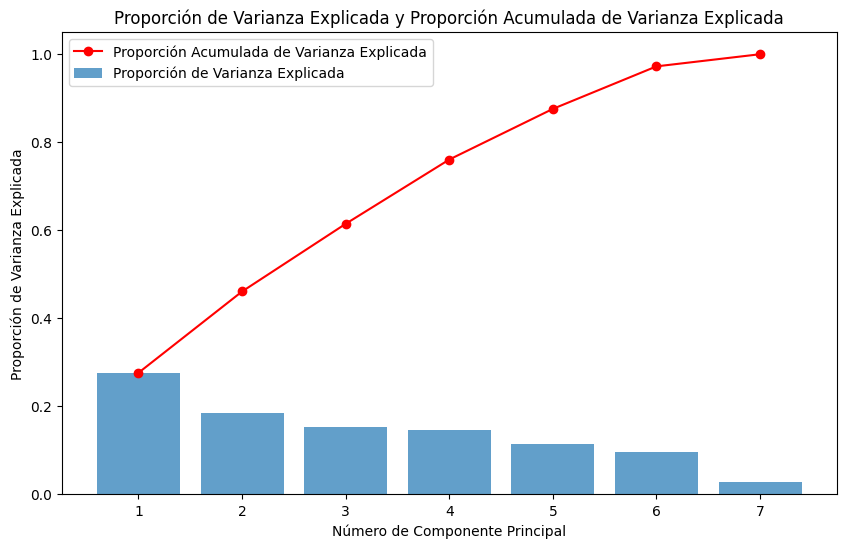

In [ ]:
# Extraer los datos necesarios del DataFrame
component_numbers = range(1, len(pca_exp_var_df) + 1)
explained_variance = pca_exp_var_df['Proporción de varianza explicada']
cumulative_variance = pca_exp_var_df['Proporción acumulada de varianza explicada']

# Crear el gráfico de barras para la Proporción de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(component_numbers, explained_variance, alpha=0.7, align='center', label='Proporción de Varianza Explicada')

# Crear el gráfico de línea para la Proporción acumulada de varianza explicada
plt.plot(component_numbers, cumulative_variance, marker='o', color='red', label='Proporción Acumulada de Varianza Explicada')

# Etiquetas y título del gráfico
plt.xlabel('Número de Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Proporción de Varianza Explicada y Proporción Acumulada de Varianza Explicada')
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()

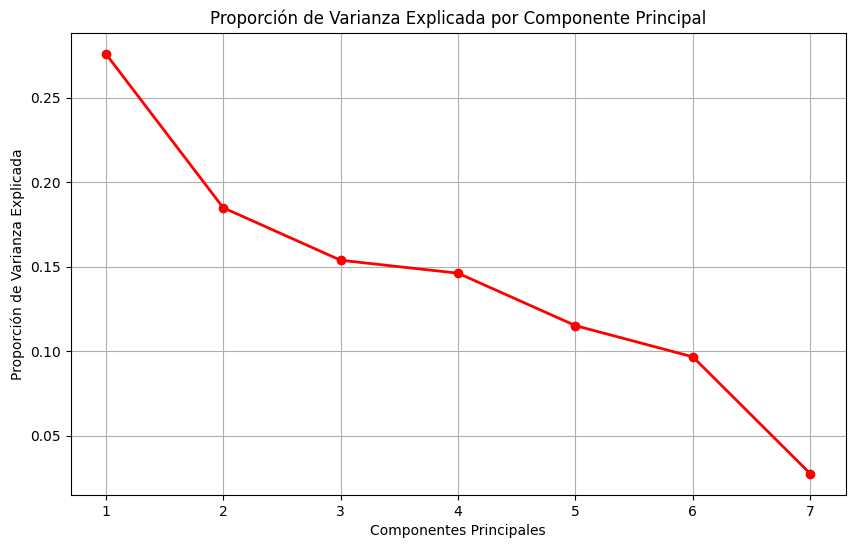

In [ ]:
# Extraer los datos necesarios del DataFrame
component_numbers = range(1, len(pca_exp_var_df) + 1)
explained_variance = pca_exp_var_df['Proporción de varianza explicada']

# Crear el gráfico de líneas para la Proporción de varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(component_numbers, explained_variance, marker='o', color='red', linestyle='-', linewidth=2)
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Proporción de Varianza Explicada por Componente Principal')
plt.grid(True)

# Mostrar el gráfico
plt.show()

   Componente Principal  Eigenvalues
0                     1     1.931218
1                     2     1.293910
2                     3     1.076509
3                     4     1.022891
4                     5     0.805928
5                     6     0.676562
6                     7     0.192981


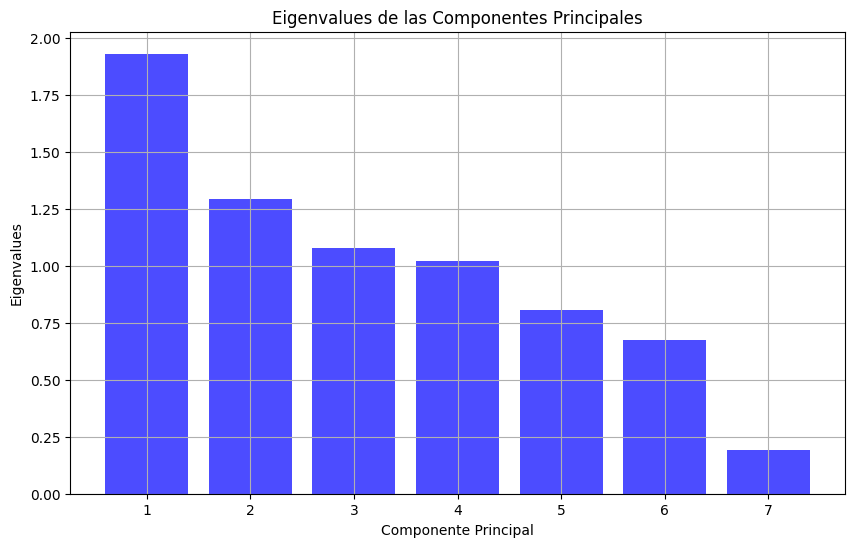

In [ ]:
# Calcula los eigenvalues de las componentes principales
eigenvalues = np.var(principal_components, axis=0)

# Crea un DataFrame con los eigenvalues
eigenvalues_df = pd.DataFrame({'Componente Principal': range(1, len(eigenvalues) + 1),
                               'Eigenvalues': eigenvalues})

# Gráfica los eigenvalues
plt.figure(figsize=(10, 6))
plt.bar(eigenvalues_df['Componente Principal'], eigenvalues_df['Eigenvalues'], color='blue', alpha=0.7)
plt.xlabel('Componente Principal')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues de las Componentes Principales')
plt.grid(True)

# Muestra el DataFrame
print(eigenvalues_df)

# Muestra el gráfico
plt.show()

Se tuvo en cuenta el criterio de la varianza explicada, la regla de Kaiser y la capacidad de graficar para tomar las primeras tres variables. Las primeras tres acumulan más del %76 y tienen eigenvalores superiores a 1. Además si bien la gráfica Proporción de variabilidad explicada - Componentes principales no describen un clar "codo" puede verse que el cambio de la variabilidad explicada en la componente 4 cae mucho comprado con los cambios anteriores. Por último, tomar tres variables nos permite graficar el resultado.


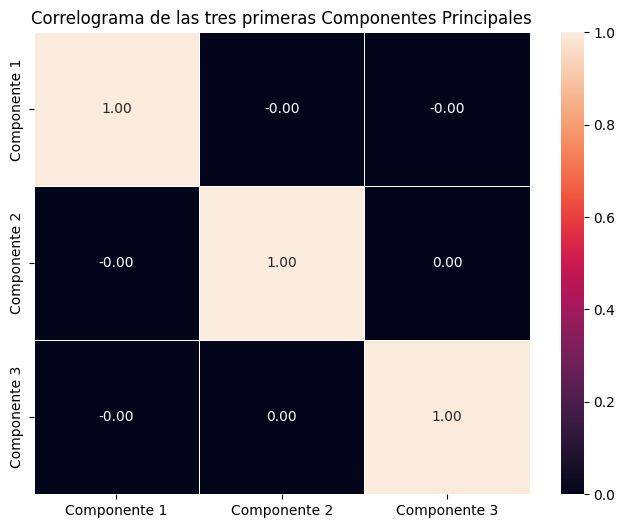

In [ ]:
# Crea un DataFrame con las tres primeras componentes principales
correlogram_data = pd.DataFrame(data=principal_components[:, :3], columns=['Componente 1', 'Componente 2', 'Componente 3'])

# Calcula la matriz de correlación entre las componentes principales
correlation_matrix = correlogram_data.corr()

# Crea un mapa de calor (correlograma) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f", linewidths=0.5)
plt.title('Correlograma de las tres primeras Componentes Principales')
plt.show()

In [ ]:
features = crop_recommendation_df.drop(columns=['label']).columns.to_list()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(principal_components, x=0, y=1, color = pca_df["label"],  labels={'color': 'label'})
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0]*4.5,
        y1=loadings[i, 1]*4.5
    )
    fig.add_annotation(
        x=loadings[i, 0]*5.5,
        y=loadings[i, 1]*5.5,
        ax=0, ay=0,
        xanchor='center',
        yanchor='bottom',
        text=feature,
    )
fig.update_layout(title = "Biplot",width = 1200,height = 600)
fig.show()
fig = px.scatter_3d(principal_components, x=0, y=1, z=2,
              color=pca_df["label"],  labels={'color': 'label'})
fig.show()

## 4 - Isomap

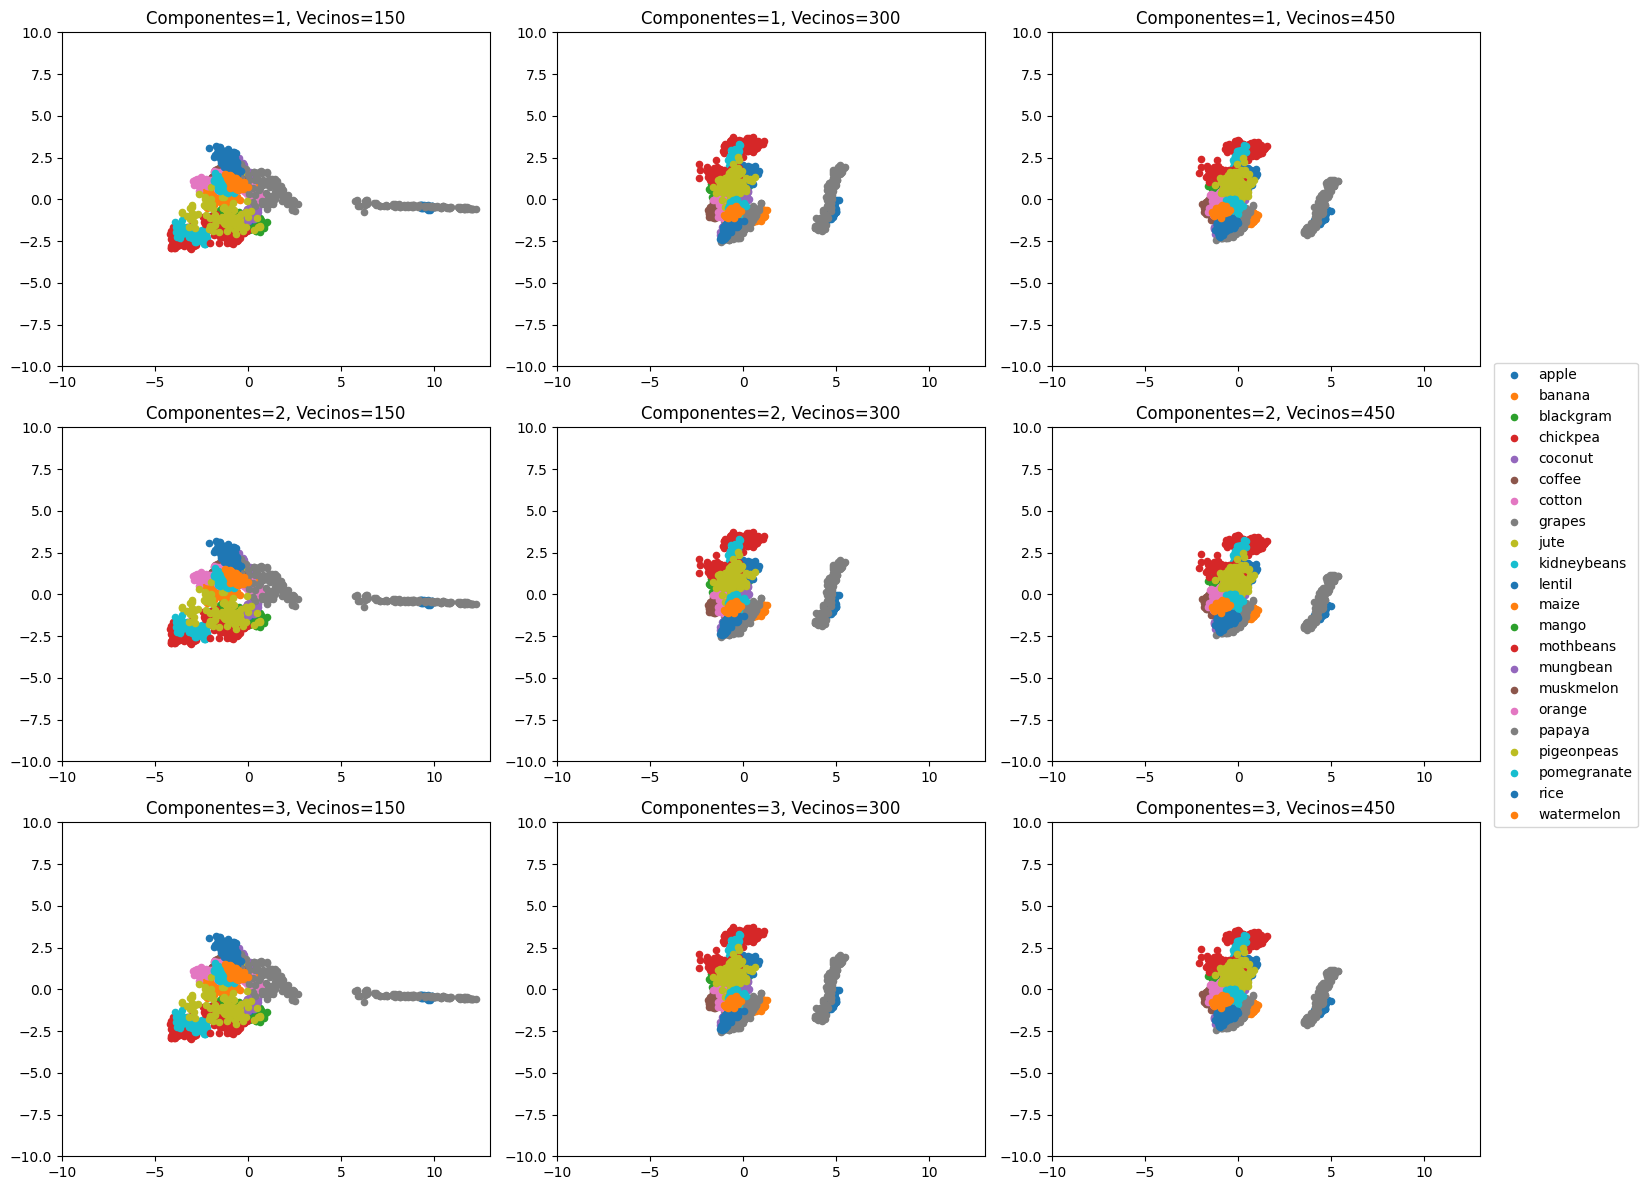

In [ ]:
# Número de componentes principales y vecinos a probar
n_components_list = [1, 2, 3]
n_neighbors_list = [150, 300, 450]

# Codificar las etiquetas de clase en valores numéricos
label_encoder = LabelEncoder()
label_numbers = label_encoder.fit_transform(crop_recommendation_df["label"])

# Crear una figura con subplots
fig, axes = plt.subplots(len(n_components_list), len(n_neighbors_list), figsize=(15, 12))

# Definir un rango de ejes para mantener proporciones iguales
x_min, x_max = -10, 13
y_min, y_max = -10, 10

for i, n_components in enumerate(n_components_list):
    for j, n_neighbors in enumerate(n_neighbors_list):
        # Aplicar Isomap con diferentes números de vecinos y componentes
        isomap = Isomap(n_neighbors=n_neighbors, n_components=2)  # Reducir a 2 componentes para el gráfico en 2D
        reduced_data = isomap.fit_transform(standardized_data)

        # Graficar los resultados en 2D con colores por clase
        ax = axes[i, j]
        for class_num in np.unique(label_numbers):
            mask = label_numbers == class_num
            ax.scatter(reduced_data[mask, 0], reduced_data[mask, 1], marker='o', s=20, label=label_encoder.classes_[class_num])
        ax.set_title(f'Componentes={n_components}, Vecinos={n_neighbors}')  # Información sobre componentes principales
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)

# Añadir una única leyenda en el lado derecho (ajustar bbox_to_anchor para mover la leyenda más a la derecha)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

# Ajustar el espacio entre subplots y mostrar la figura
plt.tight_layout()
plt.show()

In [ ]:
isomap_df = Isomap(n_neighbors=200, n_components=3)
isomap_df.fit(standardized_data)
projections_isomap = isomap_df.transform(standardized_data)

fig = px.scatter_3d(
    projections_isomap, x=0, y=1, z=2,
    color=crop_recommendation_df['label'], labels={'color': 'Alimento'}
)
fig.update_traces(marker_size=8)
fig.show()

## 5 - t-SNE

In [ ]:
# Añadir la columna 'label' a los datos estandarizados
standardized_df = pd.DataFrame(standardized_data, columns=data_to_standardize.columns)
standardized_df['label'] = crop_recommendation_df['label']

# Configuraciones para t-SNE
iterations_list = [500, 1000, 1500]  # Diferentes números de iteraciones
components_list = [2, 3]  # Diferentes números de componentes t-SNE
perplexity_list = [5, 15, 25]  # Diferentes valores de perplejidad

# Generar gráficos interactivos para cada combinación de parámetros
for iterations in iterations_list:
    for components in components_list:
        for perplexity in perplexity_list:
            # Aplicar t-SNE
            tsne = TSNE(n_components=components, n_iter=iterations, perplexity=perplexity, random_state=42)
            tsne_results = tsne.fit_transform(standardized_data)

            # Crear un DataFrame para los resultados de t-SNE en 2D
            tsne_df = pd.DataFrame(data=tsne_results[:, :2], columns=['Component 1', 'Component 2'])

            # Agregar la columna 'label' nuevamente
            tsne_df['label'] = crop_recommendation_df['label']

            # Crear un gráfico interactivo de dispersión 2D con etiquetas al hacer hover
            fig = px.scatter(tsne_df, x='Component 1', y='Component 2', color='label',
                             labels={'label': 'Etiqueta'}, hover_name='label',
                             title=f't-SNE (Iter: {iterations}, Comp: {components}, Perp: {perplexity})')

            # Ajustar la relación de aspecto para que no estén alargados
            fig.update_layout(autosize=False, width=800, height=600)

            # Mostrar el gráfico interactivo
            fig.show()




## 6 - K-Means

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
!pip install gap-stat
from gap_statistic import OptimalK

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=ccb5b34c9e48c8f2ed72402f1e0d1ed39b8e821bc09dccdd799e432a51fe8861
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [ ]:
# Estandarizar los datos
data_to_standardize = crop_recommendation_df.drop(columns=['label'])
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_to_standardize)

Diagrama del codo

GAP

Gráfico 3D

Interpretaciones

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

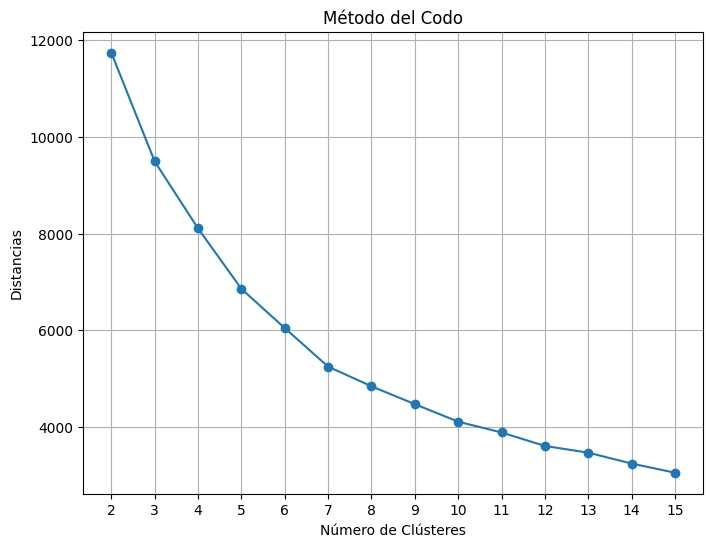

In [ ]:
# Técnica del codo para elegir el número de clusters

distancias = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(standardized_data)
    distancias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 16), distancias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Distancias')
plt.xticks(np.arange(2, 16))
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(standardized_data) #Entrenamos el modelo

# El metodo labels_ nos da a que cluster corresponde cada observacion
crop_recommendation_kmeans_df =crop_recommendation_df
crop_recommendation_kmeans_df['Cluster KMeans'] = kmeans.labels_
crop_recommendation_kmeans_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   Cluster KMeans  
0               5  
1               5  
2               5  
3               5  
4               5

In [ ]:
gs = OptimalK(n_jobs=1, n_iter=10)
numero_clusters = gs(standardized_data, n_refs=30, cluster_array=np.arange(2,16)) #n_refs number of sample reference datasets to create
print('Optimal clusters: ', numero_clusters)

# Gap Statistics data frame
gs.gap_df[['n_clusters', 'gap_value']]

Optimal clusters:  15


n_clusters  gap_value
0          2.0   0.832370
1          3.0   0.747899
2          4.0   0.990526
3          5.0   1.084703
4          6.0   1.125321
5          7.0   1.153438
6          8.0   1.282629
7          9.0   1.327717
8         10.0   1.405544
9         11.0   1.457952
10        12.0   1.488823
11        13.0   1.491723
12        14.0   1.553994
13        15.0   1.562405

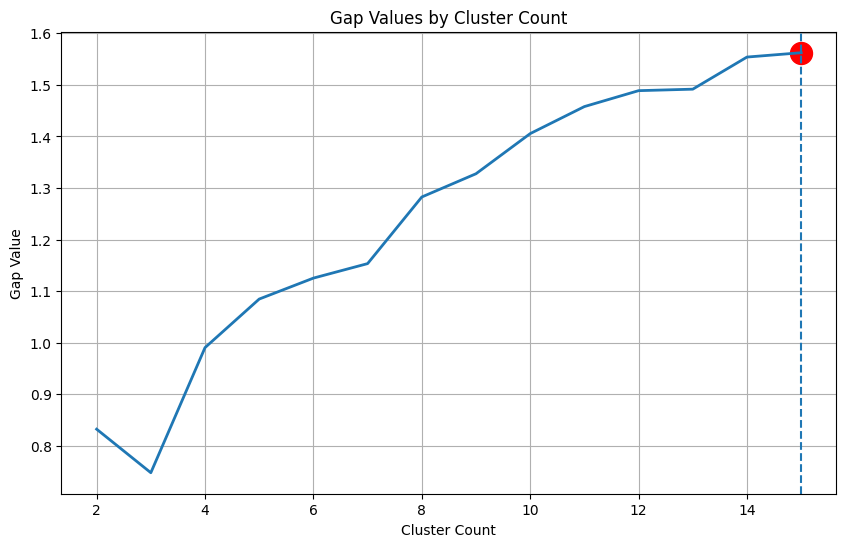

In [ ]:
# Graficamos los gap values con respecto al número de clusters
plt.figure(figsize=(10,6))
plt.plot(gs.gap_df.n_clusters, gs.gap_df.gap_value, linewidth=2)
plt.scatter(gs.gap_df[gs.gap_df.n_clusters == numero_clusters].n_clusters,
            gs.gap_df[gs.gap_df.n_clusters == numero_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.axvline(numero_clusters, linestyle="--")
plt.show()

In [ ]:
crop_recommendation_kmeans_df['Cluster KMeans'] = crop_recommendation_kmeans_df['Cluster KMeans'].astype(str)

In [ ]:
# Diccionario de asignación de colores
colores_personalizados = ['#264653',
    '#2a9d8f',
    '#f4a261',
    '#e76f51',
    '#c1121f',
    '#5f0f40',
    '#a7c957']


# Con PCA
pca = PCA(n_components=3)
componentes_principales = pca.fit_transform(standardized_data)

fig = px.scatter_3d(componentes_principales, x=0, y=1, z=2,
              color=crop_recommendation_kmeans_df['Cluster KMeans'], color_discrete_sequence=colores_personalizados, labels={'color': 'class'})
fig.show()

# Sin PCA usando caracteristicasa originales
fig = px.scatter_3d(crop_recommendation_kmeans_df[['temperature', 'humidity', 'ph']], x='temperature', y='humidity', z='ph',
              color=crop_recommendation_kmeans_df['Cluster KMeans'], color_discrete_sequence=colores_personalizados, labels={'color': 'Cluster KMeans'})
fig.show()

In [ ]:
crop_recommendation_kmeans_df.groupby('Cluster KMeans').mean()

<ipython-input-39-b61b3631cdf0>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



N           P           K  temperature   humidity  \
Cluster KMeans                                                              
0               99.204198   42.055344   38.057252    25.663235  80.026258   
1               28.153846   56.972028   22.568765    28.899967  70.727030   
2               21.990000  133.375000  200.000000    23.240259  87.104305   
3               29.518018   67.617117   47.036036    19.527767  22.072149   
4               20.262626   45.545455   24.500000    29.824545  49.944578   
5               78.440476   44.645833   38.485119    26.002449  77.135476   
6               20.048110   17.920962   27.766323    23.659163  92.291528   

                      ph    rainfall  
Cluster KMeans                        
0               6.416158   71.166221  
1               7.108460   61.654210  
2               5.977800   91.133304  
3               6.502897   96.499741  
4               5.415925  102.786330  
5               6.652044  195.308011  
6               6.441982  131.458755

<ipython-input-40-f8fb346630e6>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



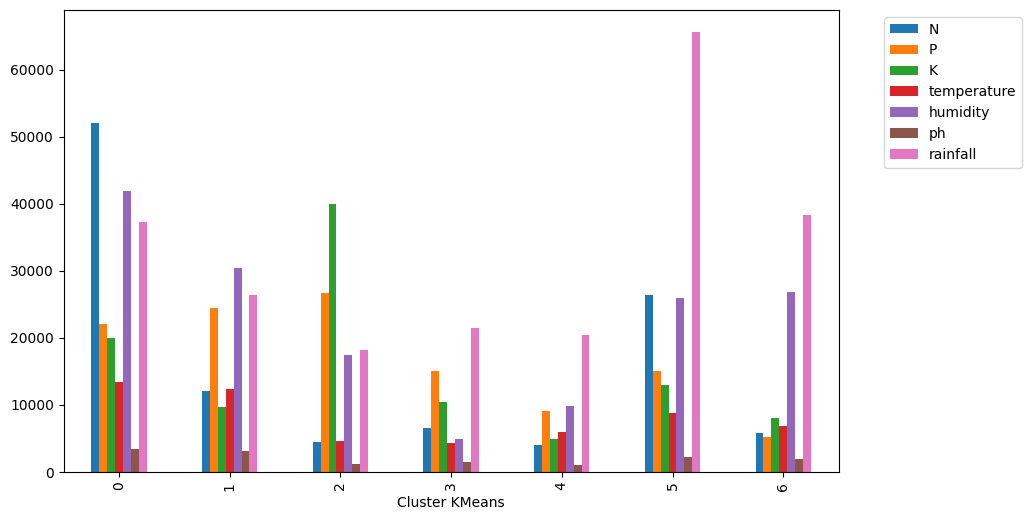

In [ ]:
crop_recommendation_kmeans_df.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

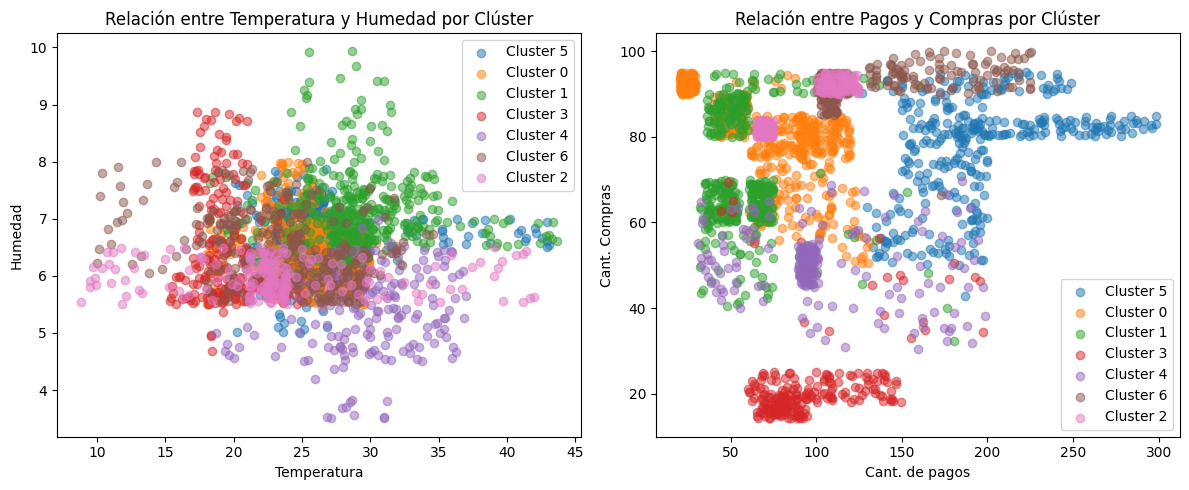

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.sca(ax[0])
for cluster_label in crop_recommendation_kmeans_df['Cluster KMeans'].unique():
    cluster_data = crop_recommendation_kmeans_df[crop_recommendation_kmeans_df['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['temperature'], cluster_data['ph'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.title('Relación entre Temperatura y Humedad por Clúster')
plt.legend()

plt.sca(ax[1])
for cluster_label in crop_recommendation_kmeans_df['Cluster KMeans'].unique():
    cluster_data = crop_recommendation_kmeans_df[crop_recommendation_kmeans_df['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['rainfall'], cluster_data['humidity'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Cant. de pagos')
plt.ylabel('Cant. Compras')
plt.title('Relación entre Pagos y Compras por Clúster')
plt.legend()

plt.tight_layout()

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(standardized_data) #Entrenamos el modelo

# El metodo labels_ nos da a que cluster corresponde cada observacion
crop_recommendation_kmeans_df['Cluster KMeans'] = kmeans.labels_
crop_recommendation_kmeans_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   Cluster KMeans  
0               0  
1               0  
2               0  
3               0  
4               0

In [ ]:
crop_recommendation_kmeans_df['Cluster KMeans'] = crop_recommendation_kmeans_df['Cluster KMeans'].astype(str)

# Diccionario de asignación de colores
colores_personalizados = ['#264653',
    '#2a9d8f',
    '#f4a261',
    '#e76f51',
    '#c1121f'
]


# Con PCA
pca = PCA(n_components=3)
componentes_principales = pca.fit_transform(standardized_data)

fig = px.scatter_3d(componentes_principales, x=0, y=1, z=2,
              color=crop_recommendation_kmeans_df['Cluster KMeans'], color_discrete_sequence=colores_personalizados, labels={'color': 'class'})
fig.show()

# Sin PCA usando caracteristicasa originales
fig = px.scatter_3d(crop_recommendation_kmeans_df[['temperature', 'humidity', 'ph']], x='temperature', y='humidity', z='ph',
              color=crop_recommendation_kmeans_df['Cluster KMeans'], color_discrete_sequence=colores_personalizados, labels={'color': 'Cluster KMeans'})
fig.show()

In [ ]:
crop_recommendation_kmeans_df.groupby('Cluster KMeans').mean()

<ipython-input-44-b61b3631cdf0>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



N           P           K  temperature   humidity  \
Cluster KMeans                                                              
0               48.987889   32.823529   34.110727    24.542126  85.185466   
1               99.459750   41.491950   37.506261    25.634957  78.639280   
2               28.652542   67.457627   45.466102    19.706561  23.466186   
3               21.990000  133.375000  200.000000    23.240259  87.104305   
4               25.743222   52.052632   23.151515    29.572003  65.557379   

                      ph    rainfall  
Cluster KMeans                        
0               6.516116  168.115685  
1               6.437042   75.952024  
2               6.417866   98.663369  
3               5.977800   91.133304  
4               6.631671   74.132023

<ipython-input-45-f8fb346630e6>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



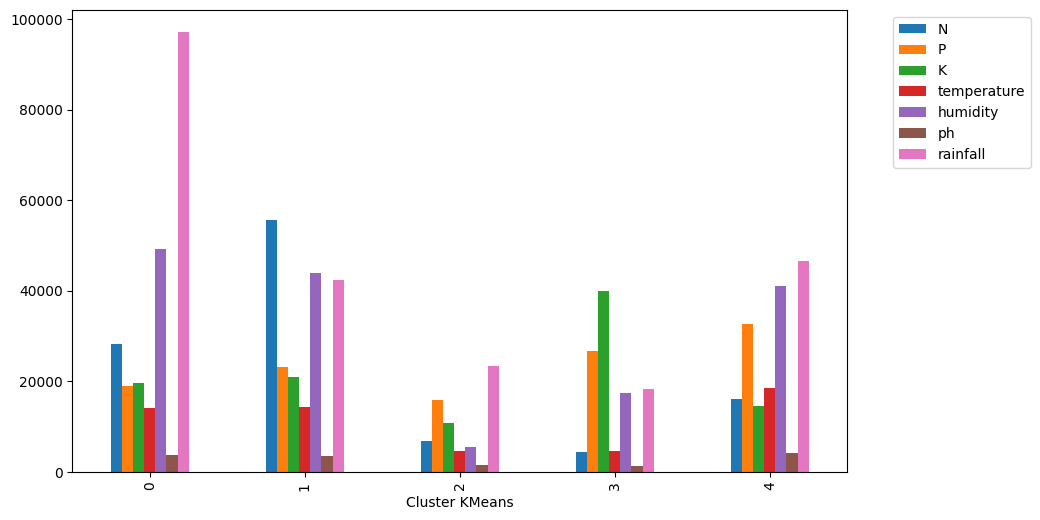

In [ ]:
crop_recommendation_kmeans_df.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

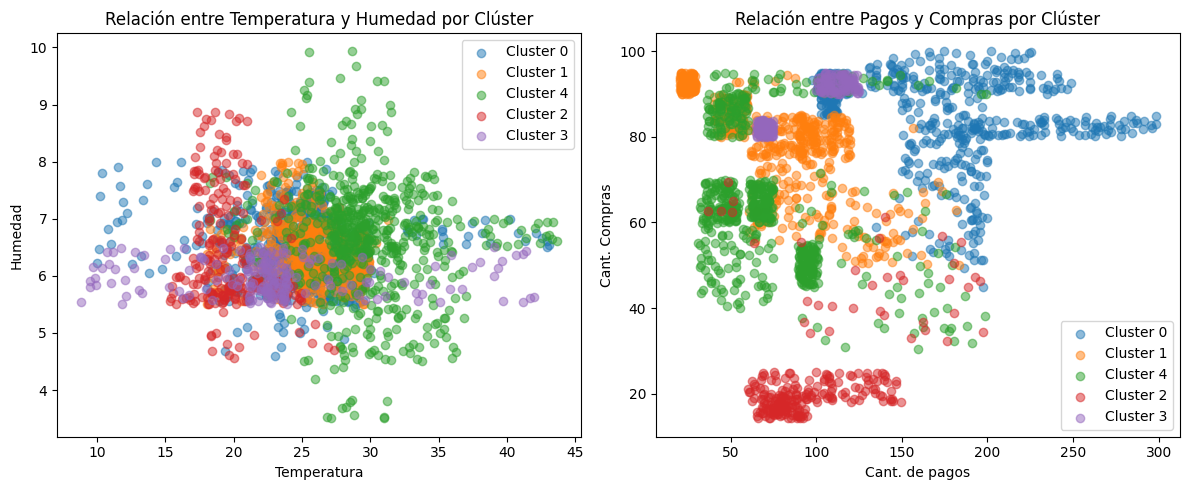

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.sca(ax[0])
for cluster_label in crop_recommendation_kmeans_df['Cluster KMeans'].unique():
    cluster_data = crop_recommendation_kmeans_df[crop_recommendation_kmeans_df['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['temperature'], cluster_data['ph'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.title('Relación entre Temperatura y Humedad por Clúster')
plt.legend()

plt.sca(ax[1])
for cluster_label in crop_recommendation_kmeans_df['Cluster KMeans'].unique():
    cluster_data = crop_recommendation_kmeans_df[crop_recommendation_kmeans_df['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['rainfall'], cluster_data['humidity'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Cant. de pagos')
plt.ylabel('Cant. Compras')
plt.title('Relación entre Pagos y Compras por Clúster')
plt.legend()

plt.tight_layout()

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(standardized_data) #Entrenamos el modelo

# El metodo labels_ nos da a que cluster corresponde cada observacion
crop_recommendation_kmeans_df['Cluster KMeans'] = kmeans.labels_
crop_recommendation_kmeans_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   Cluster KMeans  
0               4  
1               4  
2               4  
3               4  
4               4

In [ ]:
crop_recommendation_kmeans_df['Cluster KMeans'] = crop_recommendation_kmeans_df['Cluster KMeans'].astype(str)

# Diccionario de asignación de colores
colores_personalizados = ['#264653',
    '#2a9d8f',
    '#f4a261',
    '#e76f51',
    '#c1121f',
    '#5f0f40',
    '#a7c957',
    '#ef233c',
    '#ffba08',
    '#370617',
    '#2ec4b6',
    '#7c6a0a',
    '#f15bb5',
    '#a5be00']


# Con PCA
pca = PCA(n_components=3)
componentes_principales = pca.fit_transform(standardized_data)

fig = px.scatter_3d(componentes_principales, x=0, y=1, z=2,
              color=crop_recommendation_kmeans_df['Cluster KMeans'], color_discrete_sequence=colores_personalizados, labels={'color': 'class'})
fig.show()

# Sin PCA usando caracteristicasa originales
fig = px.scatter_3d(crop_recommendation_kmeans_df[['temperature', 'humidity', 'ph']], x='temperature', y='humidity', z='ph',
              color=crop_recommendation_kmeans_df['Cluster KMeans'], color_discrete_sequence=colores_personalizados, labels={'color': 'Cluster KMeans'})
fig.show()

In [ ]:
crop_recommendation_kmeans_df.groupby('Cluster KMeans').mean()

<ipython-input-49-b61b3631cdf0>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



N           P           K  temperature   humidity  \
Cluster KMeans                                                              
0               21.774390  133.701220  199.987805    20.708749  88.196923   
1               22.000000   17.664122   28.740458    27.646261  93.863284   
10              47.338710   54.290323   45.032258    37.999118  92.402332   
11              18.512346   17.882716   26.759259    20.499866  90.850867   
12              25.983806   57.659919   22.080972    27.474121  75.481498   
13              98.924528   80.811321   49.603774    27.413722  80.696604   
14              21.696629   42.359551   24.584270    30.260087  50.268428   
2               98.473684   44.157895   21.951417    23.634185  69.740364   
3               28.878571   59.850000   19.685714    28.469218  60.836145   
4               81.036900   44.092251   38.424354    24.678294  77.553287   
5               99.870000   17.360000   50.150000    27.127416  88.751589   
6               20.060870   45.686957   25.339130    31.063314  49.109697   
7               20.133333   67.762963   22.348148    20.157494  27.114637   
8               40.410526   67.989474   79.831579    18.882241  16.907768   
9               22.972222  131.888889  200.055556    34.772690  82.126823   

                      ph    rainfall  
Cluster KMeans                        
0               5.986700   95.802182  
1               6.052385  162.140354  
10              6.838782  151.445282  
11              6.748270  108.873062  
12              6.697862   53.844461  
13              6.007302  103.752192  
14              4.821466   86.907601  
2               6.633165   92.361608  
3               7.821737   58.635979  
4               6.624173  199.791507  
5               6.427292   37.738086  
6               6.239544  113.940046  
7               5.718677  116.193287  
8               7.403579   79.907281  
9               5.937253   69.863973

<ipython-input-50-f8fb346630e6>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



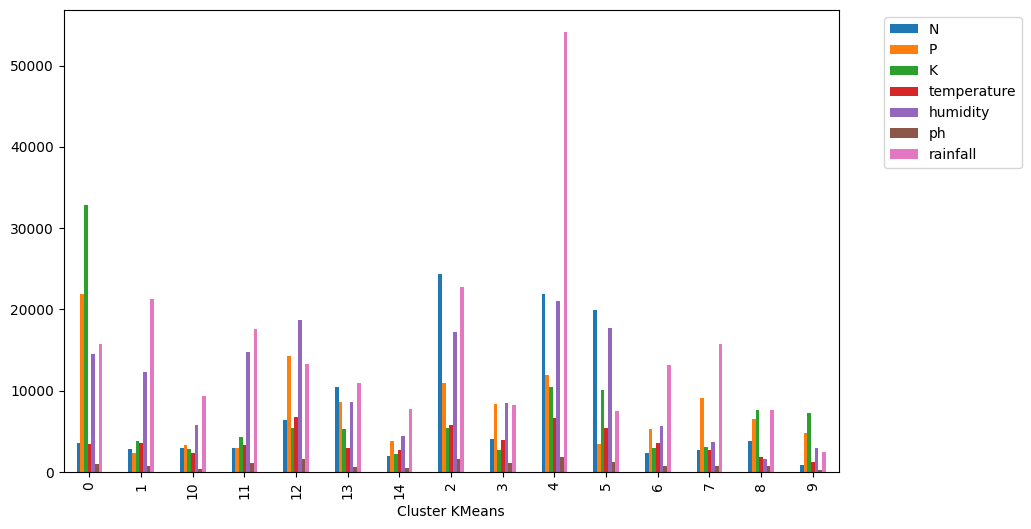

In [ ]:
crop_recommendation_kmeans_df.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

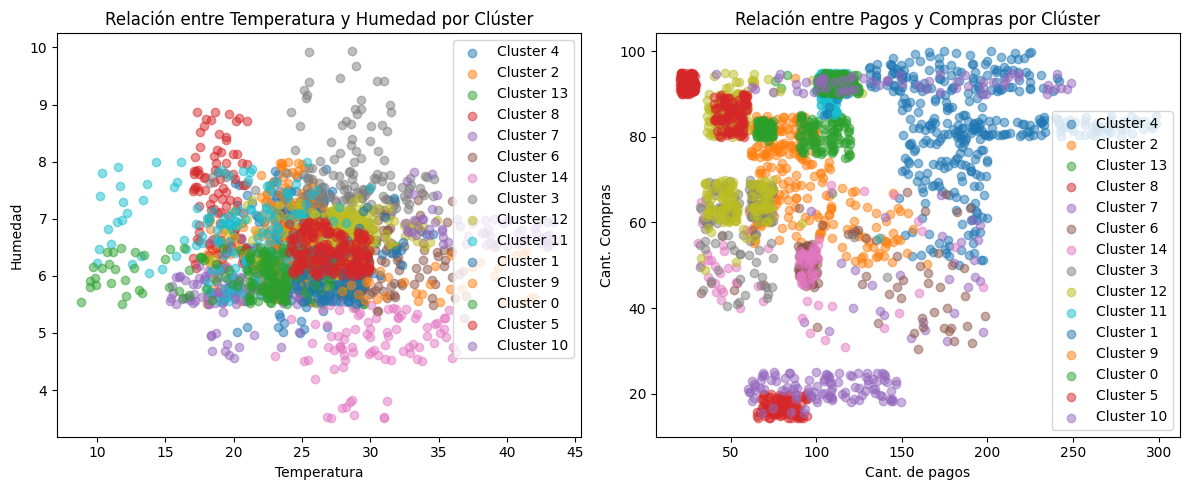

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.sca(ax[0])
for cluster_label in crop_recommendation_kmeans_df['Cluster KMeans'].unique():
    cluster_data = crop_recommendation_kmeans_df[crop_recommendation_kmeans_df['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['temperature'], cluster_data['ph'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.title('Relación entre Temperatura y Humedad por Clúster')
plt.legend()

plt.sca(ax[1])
for cluster_label in crop_recommendation_kmeans_df['Cluster KMeans'].unique():
    cluster_data = crop_recommendation_kmeans_df[crop_recommendation_kmeans_df['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['rainfall'], cluster_data['humidity'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Cant. de pagos')
plt.ylabel('Cant. Compras')
plt.title('Relación entre Pagos y Compras por Clúster')
plt.legend()

plt.tight_layout()

plt.show()

Calcular el número óptimo de clusters utilizando la métrica GAP:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

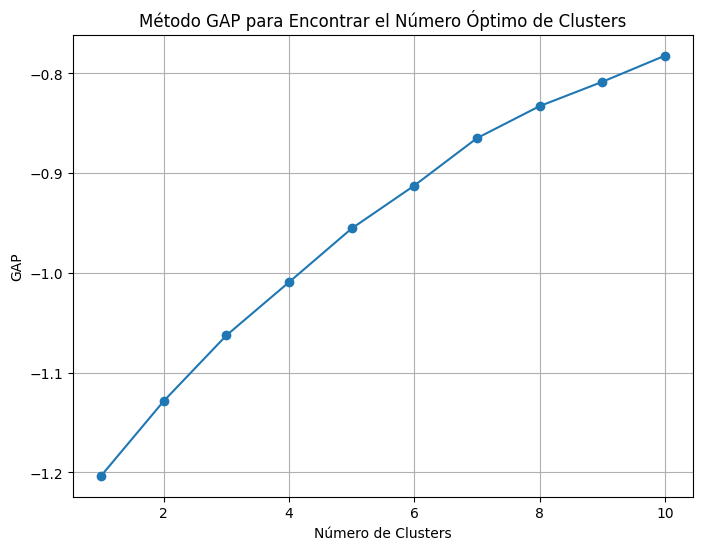

Número óptimo de clusters según el método GAP: 10


In [ ]:
# Rango de número de clusters a probar
k_range = range(1, 11)
gap_scores = []

for k in k_range:
    # Aplicar K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_data)

    # Calcular la suma de las distancias cuadradas dentro del cluster
    cluster_distances = pairwise_distances_argmin_min(standardized_data, kmeans.cluster_centers_)
    cluster_distances = np.array(cluster_distances[1])
    intra_cluster_distance = np.sum(cluster_distances)

    # Generar datos aleatorios para calcular el GAP
    random_data = np.random.rand(*standardized_data.shape)
    random_kmeans = KMeans(n_clusters=k, random_state=42)
    random_kmeans.fit(random_data)

    # Calcular la suma de las distancias cuadradas dentro del cluster para datos aleatorios
    random_cluster_distances = pairwise_distances_argmin_min(random_data, random_kmeans.cluster_centers_)
    random_cluster_distances = np.array(random_cluster_distances[1])
    random_intra_cluster_distance = np.sum(random_cluster_distances)

    # Calcular el GAP
    gap = np.log(random_intra_cluster_distance) - np.log(intra_cluster_distance)
    gap_scores.append(gap)

# Encontrar el número óptimo de clusters
optimal_k = gap_scores.index(max(gap_scores)) + 1

# Graficar el resultado del método GAP
plt.figure(figsize=(8, 6))
plt.plot(k_range, gap_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('GAP')
plt.title('Método GAP para Encontrar el Número Óptimo de Clusters')
plt.grid(True)
plt.show()

print(f'Número óptimo de clusters según el método GAP: {optimal_k}')


## 7 - Clustereing jerárquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

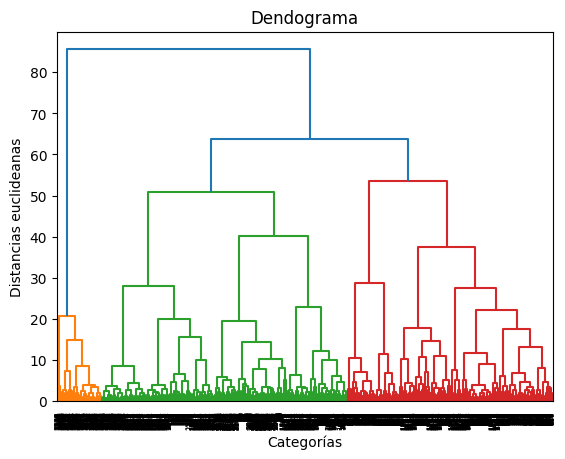

In [ ]:
# Creamos el dendrograma para encontrar el número óptimo de clusters
linkage = sch.linkage(standardized_data, method='ward')
dendrogram = sch.dendrogram(linkage)

plt.title('Dendograma')
plt.xlabel('Categorías')
plt.ylabel('Distancias euclideanas')
plt.show()

Como se dificulta visualizar el gráfico en su totalidad ya que sobre el final la cantidad de clusters es elevada se procede a recortarlo para una mejor visualización

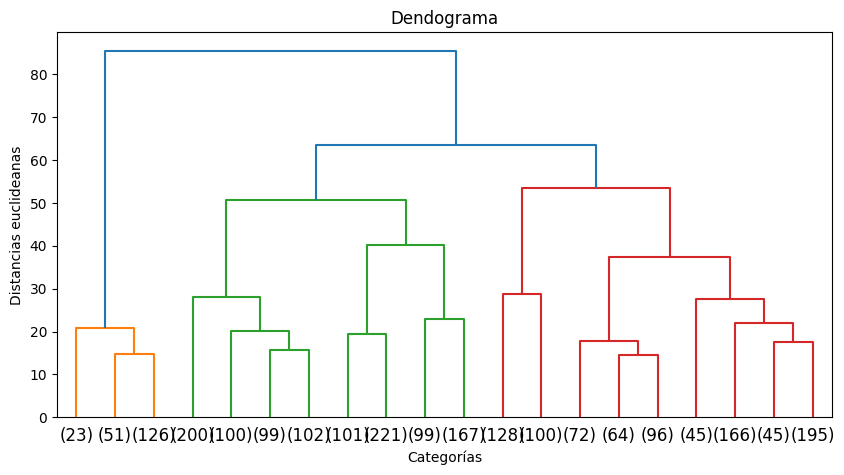

In [ ]:
# Genera el linkage y el dendrograma
linkage = sch.linkage(standardized_data, method='ward')

# Crea una figura con el tamaño deseado
fig, ax = plt.subplots(figsize=(10, 5))

dendrogram = sch.dendrogram(linkage, truncate_mode='lastp', p=20)

plt.title('Dendograma')
plt.xlabel('Categorías')
plt.ylabel('Distancias euclideanas')
plt.show()

Se observa que a partir de 7 clusters las distancias no tienen demasiada variación por lo que se estima que dicho número de clusteres podría ser adecuado para el set de datos.

Se utilizará adicionalmente el método del codo para determinar el número óptimo de clusters.

In [ ]:
from scipy.spatial.distance import cdist

distancias=[]
for i in range(1, 16):
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(standardized_data)

    # Calculo la matriz de distancias entre puntos
    pairwise_distances = cdist(standardized_data, standardized_data, 'euclidean')

    # Calculo la distancia total entre los clusters
    distancia_total = 0
    for j in range(i):
        cluster_indices = np.where(clustering.labels_ == j)
        distancia_total += pairwise_distances[cluster_indices][:, cluster_indices].sum()

    distancias.append(distancia_total)

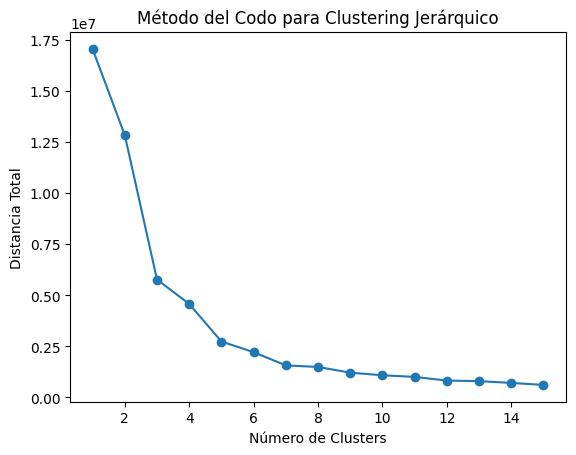

In [ ]:
plt.plot(range(1, 16), distancias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Distancia Total')
plt.title('Método del Codo para Clustering Jerárquico')
plt.show()

En el método del codo se observa que incluso 5 clústers sería una cantidad adecuada para agrupar los datos.

Se recuerda también que según la métrica GAP el número de clusters en los que deberían agruparse los datos es 15.

Se procederá entonces a modelar el clustering jerárquico con estas diferentes cantidades de clusters y se observarán los resultados.

In [ ]:
n_clusters = 7
clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(standardized_data)

crop_recommendation_jerarquico_df = crop_recommendation_df
crop_recommendation_jerarquico_df['Cluster_jerarquico'] = cluster_assignments

crop_recommendation_jerarquico_df.head()

N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

  Cluster KMeans  Cluster_jerarquico  
0              4                   5  
1              4                   5  
2              4                   5  
3              4                   5  
4              4                   5

Se utiliza la mérica de Silhouette para conocer la bondad de la técnica de agrupación.

In [ ]:
from sklearn.metrics import silhouette_score,silhouette_samples
print(f'Silhouette score (n=6): {silhouette_score(standardized_data, cluster_assignments)}')

Silhouette score (n=6): 0.3169065328199988


In [ ]:
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(standardized_data)

crop_recommendation_jerarquico_df = crop_recommendation_df
crop_recommendation_jerarquico_df['Cluster_jerarquico'] = cluster_assignments

crop_recommendation_jerarquico_df.head()

N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

  Cluster KMeans  Cluster_jerarquico  
0              4                   0  
1              4                   0  
2              4                   0  
3              4                   0  
4              4                   0

In [ ]:
print(f'Silhouette score (n=6): {silhouette_score(standardized_data, cluster_assignments)}')

Silhouette score (n=6): 0.28202584908038836


In [ ]:
n_clusters = 15
clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(standardized_data)

crop_recommendation_jerarquico_df = crop_recommendation_df
crop_recommendation_jerarquico_df['Cluster_jerarquico'] = cluster_assignments

crop_recommendation_jerarquico_df.head()

N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

  Cluster KMeans  Cluster_jerarquico  
0              4                   6  
1              4                   6  
2              4                   6  
3              4                   6  
4              4                   6

In [ ]:
print(f'Silhouette score (n=6): {silhouette_score(standardized_data, cluster_assignments)}')

Silhouette score (n=6): 0.33095277810905444


Graficar Sihouette score para cada cantidad de clusters
Graficar cantidad de iteraciones vs cantidad de clusters en GAP
